# Apriori

In [1]:
from itertools import combinations
import csv

def apriori(dataset, min_support=0.5, min_confidence=0.7):
    itemsets = []
    items = set()

    # Get all unique items
    for transaction in dataset:
        for item in transaction:
            items.add(item)

    # Generate all possible item combinations
    for i in range(1, len(items) + 1):
        for combo in combinations(items, i):
            count = 0
            for transaction in dataset:
                if set(combo).issubset(transaction):
                    count += 1
            support = count / len(dataset)
            if support >= min_support:
                itemsets.append((combo, round(support, 2)))

    # Generate association rules
    rules = []
    for itemset, support in itemsets:
        if len(itemset) > 1:
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    consequent = tuple(sorted(set(itemset) - set(antecedent)))

                    # Find supports
                    support_itemset = next((s for c, s in itemsets if set(c) == set(itemset)), 0)
                    support_antecedent = next((s for c, s in itemsets if set(c) == set(antecedent)), 0)

                    if support_antecedent > 0:
                        confidence = round(support_itemset / support_antecedent, 2)
                        if confidence >= min_confidence:
                            rules.append((antecedent, consequent, confidence))

    return itemsets, rules


# --- Use CSV (optional, comment out if not needed) ---
# dataset = []
# with open('transactions.csv', 'r') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         dataset.append([item.strip() for item in row if item.strip()])

# --- Sample dataset ---
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'diaper', 'beer', 'bread'],
    ['bread', 'butter'],
    ['milk', 'diaper', 'bread', 'butter'],
    ['diaper', 'beer'],
    ['milk', 'bread', 'butter', 'beer'],
    ['bread', 'butter']
]

frequent_itemsets, rules = apriori(transactions, min_support=0.3, min_confidence=0.7)

print("\nFrequent Itemsets (Support ≥ 0.3):")
for itemset, support in frequent_itemsets:
    print(f"{itemset}: {support}")

print("\nStrong Association Rules (Confidence ≥ 0.7):")
for antecedent, consequent, confidence in rules:
    print(f"{antecedent} => {consequent}, Confidence: {confidence}")


Frequent Itemsets (Support ≥ 0.3):
('beer',): 0.38
('diaper',): 0.38
('bread',): 0.88
('milk',): 0.62
('butter',): 0.62
('bread', 'milk'): 0.62
('bread', 'butter'): 0.62
('milk', 'butter'): 0.38
('bread', 'milk', 'butter'): 0.38

Strong Association Rules (Confidence ≥ 0.7):
('bread',) => ('milk',), Confidence: 0.7
('milk',) => ('bread',), Confidence: 1.0
('bread',) => ('butter',), Confidence: 0.7
('butter',) => ('bread',), Confidence: 1.0
('milk', 'butter') => ('bread',), Confidence: 1.0


# EDA


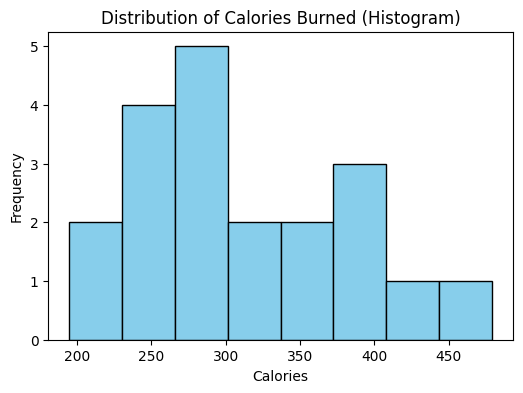

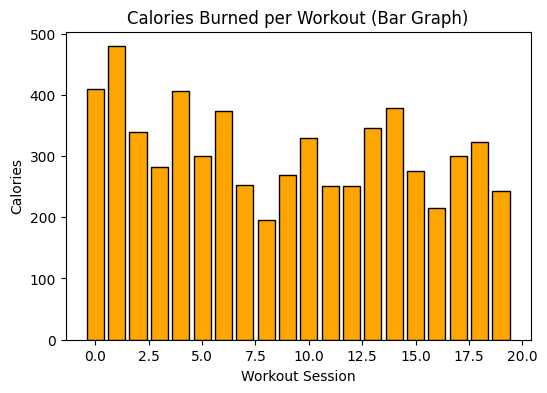

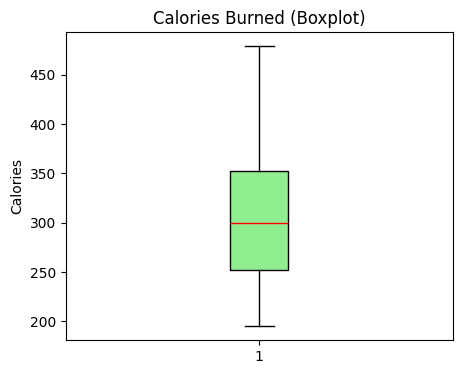

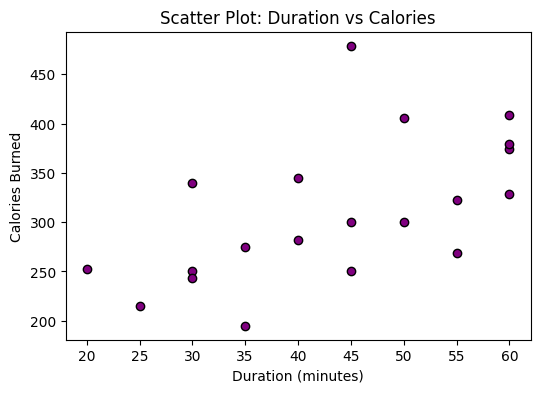

📈 Correlation Matrix:
           Duration     Pulse  Maxpulse  Calories
Duration  1.000000  0.650494  0.162384  0.582221
Pulse     0.650494  1.000000  0.517813  0.473654
Maxpulse  0.162384  0.517813  1.000000  0.103465
Calories  0.582221  0.473654  0.103465  1.000000


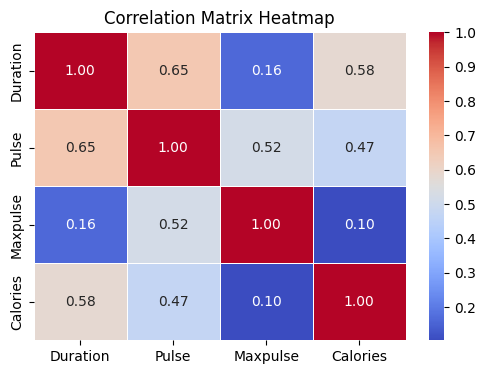

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Sample Data ===
data = {
    'Duration': [60, 45, 30, 40, 50, 45, 60, 20, 35, 55,
                 60, 45, 30, 40, 60, 35, 25, 50, 55, 30],
    'Pulse': [110, 117, 103, 109, 117, 102, 110, 100, 108, 120,
              113, 106, 109, 110, 115, 104, 107, 114, 112, 108],
    'Maxpulse': [130, 145, 135, 175, 148, 120, 150, 120, 130, 150,
                 140, 130, 175, 148, 155, 130, 145, 160, 140, 132],
    'Calories': [409, 479, 340, 282, 406, 300, 374, 253, 195, 269,
                 329, 251, 251, 345, 379, 275, 215, 300, 323, 243]
}

df = pd.DataFrame(data)

# === 1️⃣ Histogram ===
plt.figure(figsize=(6,4))
plt.hist(df['Calories'], bins=8, color='skyblue', edgecolor='black')
plt.title("Distribution of Calories Burned (Histogram)")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

# === 2️⃣ Bar Graph ===
plt.figure(figsize=(6,4))
plt.bar(df.index, df['Calories'], color='orange', edgecolor='black')
plt.title("Calories Burned per Workout (Bar Graph)")
plt.xlabel("Workout Session")
plt.ylabel("Calories")
plt.show()

# === 3️⃣ Boxplot ===
plt.figure(figsize=(5,4))
plt.boxplot(df['Calories'], patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
plt.title("Calories Burned (Boxplot)")
plt.ylabel("Calories")
plt.show()

# === 4️⃣ Scatter Plot ===
plt.figure(figsize=(6,4))
plt.scatter(df['Duration'], df['Calories'], color='purple', edgecolors='black')
plt.title("Scatter Plot: Duration vs Calories")
plt.xlabel("Duration (minutes)")
plt.ylabel("Calories Burned")
plt.show()

# === 5️⃣ Correlation Matrix ===
corr = df.corr(numeric_only=True)
print("📈 Correlation Matrix:\n", corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()